<center> <font size="6"><b>Hackathon - Predicting heart rate to monitor stress level</b></font> </center> 


<center> <font size="5"><b>by: </b>DataTime (Sathyanarayanan V)</font> </center> 


<font size="4"> <b> • BUSINESS CONTEXT: </b>Anxiety and stress make your heart work harder. When you’re under stress your body’s “fight or flight” response is triggered i.e. your body tenses, your blood pressure rises and your heart beats faster. Stress hormones may damage the lining of the arteries. In the current scenario post-covid, since most of us are indoors, stress levels are at an all time high due to increasing anxieties which is leading to a higher heart rate. And your body's response to stress may be a headache, back strain, or stomach pains. Stress can also zap your energy, wreak havoc on your sleep and make you feel cranky, forgetful and out of control.
    
Higher heart rate is not always better since pathological conditions can lead to an increased heart rate. Tachycardia refers to a fast resting heart rate, usually over 100 beats per minute. Tachycardia can be dangerous, depending on its underlying cause and on how hard the heart has to work.
    
An optimal level of heart rate is associated with health and self-regulatory capacity, and adaptability or resilience. Higher levels of resting vagally-mediated heart rate are linked to performance of executive functions like attention and emotional processing by the prefrontal cortex.
    
Higher heart rates are usually connected with higher stress levels. When stress is excessive, it can contribute to everything from high blood pressure , also called hypertension, to asthma to ulcers to irritable bowel syndrome Stress may affect behaviors and factors that increase heart disease risk: high blood pressure and cholesterol levels, smoking, physical inactivity and overeating. Some people may choose to drink too much alcohol or smoke cigarettes to “manage” their chronic stress, however these habits can increase blood pressure and may damage
artery walls.
    
Thus, heart rate can be used to monitor your stress levels and keep it under check as
it is a useful indicator of good health.
A recent study speaks about effects of stress on increased heart attacks amongst
30-40 year olds: https://economictimes.indiatimes.com/magazines/panache/heart-attacks-on-the-riseamong-30-40-year-olds-diabetes-hypertension-are-contributing-factors/articleshow/66997025.cms

<font size="4"> <b> • DATA DESCRIPTION: </b>The data comprises various attributes taken from signals measured using ECG recorded for different individuals having different heart rates at the time the measurement was taken. These various features contribute to the heart rate at the given instant of time for the individual. 
    
•You have been provided with a total of 7 CSV files with the names as follows:
    
>time_domain_features_train.csv - This file contains all time domain features of heart rate for training data
    
>frequency_domain_features_train.csv - This file  contains all frequency domain features of heart rate for training data
    
>heart_rate_non_linear_features_train.csv - This file contains all non linear features of heart rate for training data
    
>time_domain_features_test.csv -  This file contains all time domain features of heart rate for testing data
    
>frequency_domain_features_test.csv -  This file  contains all frequency domain features of heart rate for testing data
    
>heart_rate_non_linear_features_test.csv - This file contains all non linear features of heart rate for testing data
    
>sample_submission.csv - This file contains the format in which you need to make submissions to the portal
    
<font size="4"> <b> • Following is the data dictionary for the features you will come across in the files mentioned: </b>
    
>MEAN_RR - Mean of RR intervals
    
>MEDIAN_RR - Median of RR intervals
    
>SDRR - Standard deviation of RR intervals
    
>RMSSD - Root mean square of successive RR interval differences
    
>SDSD - Standard deviation of successive RR interval differences
    
>SDRR_RMSSD - Ratio of SDRR / RMSSD
    
>pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
    
>pNN50 - Percentage of successive RR intervals that differ by more than 50 ms
    
>KURT - Kurtosis of distribution of successive RR intervals
    
>SKEW - Skew of distribution of successive RR intervals
    
>MEAN_REL_RR - Mean of relative RR intervals
    
>MEDIAN_REL_RR - Median of relative RR intervals
    
>SDRR_REL_RR - Standard deviation of relative RR intervals
    
>RMSSD_REL_RR - Root mean square of successive relative RR interval differences
    
>SDSD_REL_RR - Standard deviation of successive relative RR interval differences
    
>SDRR_RMSSD_REL_RR - Ratio of SDRR/RMSSD for relative RR interval differences
    
>KURT_REL_RR - Kurtosis of distribution of relative RR intervals
    
>SKEW_REL_RR - Skewness of distribution of relative RR intervals
    
>uuid - Unique ID for each patient
    
>VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)
    
>VLF_PCT - Principal component transform of VLF
    
>LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
    
>LF_PCT - Principal component transform of LF
    
>LF_NU  - Absolute power of the low frequency band in normal units
    
>HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)
    
>HF_PCT - Principal component transform of HF
    
>HF_NU - Absolute power of the highest frequency band in normal units
    
>TP - Total power of RR intervals
    
>LF_HF - Ratio of LF to HF
    
>HF_LF - Ratio of HF to LF
    
>SD1 - Poincaré plot standard deviation perpendicular to the line of identity
    
>SD2 - Poincaré plot standard deviation along the line of identity
    
>Sampen - sample entropy which measures the regularity and complexity of a time series
    
>higuci - higuci fractal dimension of heartrate
    
>datasetId - ID of the whole dataset
    
>condition - condition of the patient at the time the data was recorded
    
>HR - Heart rate of the patient at the time of data recorded 
    
<font size="4"> <b> • Objective </b> 

•The objective is to build a regressor model which can predict the heart rate of an individual. This prediction can help to monitor stress levels of the individual.</font>

<font size="4"> <b> • Evaluation Metric </b> 
    
•Mean Absolute Error : For the formula, please refer Problem Statement / FAQ document.
</font>

<font size="5"><p style="color:black"> <b> 1. Import and warehouse data:</p></font>

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter
from sklearn.metrics import mean_squared_error
from math import sqrt

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import all the given datasets. Explore shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Sample submission dataset

In [4]:
sample=pd.read_csv("Hackathon_sample_submission.csv")
sample

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,NaN
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,NaN
2,cb573d3a-c767-4556-b32e-ad8c08ded214,NaN
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,NaN
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,NaN
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,NaN
41029,38052c36-d08d-4305-905b-830f600ce2b9,NaN
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,NaN
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Frequency Train dataset

In [5]:
frequency_features_train=pd.read_csv("frequency_domain_features_train.csv")
frequency_features_train

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912
...,...,...,...,...,...,...,...,...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087
369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804
369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.3 Frequency Test dataset

In [6]:
frequency_features_test=pd.read_csv("frequency_domain_features_test.csv")
frequency_features_test

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265
...,...,...,...,...,...,...,...,...,...,...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,21.680663,0.046124
41029,38052c36-d08d-4305-905b-830f600ce2b9,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,12.050447,0.082984
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,253.224210,0.003949
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,317.702587,57.455826,214.695243,38.827170,91.263190,20.553211,3.717004,8.736810,552.951041,10.445825,0.095732


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.4 Heart Rate Train dataset

In [7]:
heartrate_features_train=pd.read_csv("heart_rate_non_linear_features_train.csv")
heartrate_features_train

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,6.797519,50.994582,2.096850,1.314910,2,no stress
369285,03f6d164-b28d-49e8-9e27-0288577408ec,9.734243,105.502548,2.131264,1.175975,2,no stress
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,16.304530,133.797793,2.215643,1.140232,2,no stress
369287,a0fc861e-3254-4210-bd5d-37870245f7da,11.838553,110.311474,2.091628,1.181937,2,no stress


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.5 Heart Rate Test dataset

In [8]:
heartrate_features_test=pd.read_csv("heart_rate_non_linear_features_test.csv")
heartrate_features_test

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption
...,...,...,...,...,...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,7.560479,115.759345,2.127188,1.169883,2,no stress
41029,38052c36-d08d-4305-905b-830f600ce2b9,6.150725,100.293588,1.569003,1.195527,2,no stress
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,15.388795,138.015139,2.131040,1.217576,2,interruption
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,5.327684,66.745112,1.949010,1.244982,2,no stress


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.6 Time Test dataset

In [9]:
Time_features_train = pd.read_csv("time_domain_features_train.csv")
Time_features_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,1.007321,0.075965,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965,028ae89f-0120-4808-955f-f6b3ecaa59b3
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,0.248964,0.167716,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716,03f6d164-b28d-49e8-9e27-0288577408ec
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,-0.429686,-0.075321,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321,fd717478-95c3-48fc-bcdc-3adebae824ab
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,0.600389,-0.634762,0.000024,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762,a0fc861e-3254-4210-bd5d-37870245f7da


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.7 Time Test dataset

In [10]:
Time_features_test = pd.read_csv("time_domain_features_test.csv")
Time_features_test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,934.665288,939.031730,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,62b75db5-bc40-4c8f-9166-daf0efcab4c2
1,817.062380,816.338790,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,a99549ad-3eb6-4413-bc90-9053e7f7e684
2,876.762022,894.198890,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,cb573d3a-c767-4556-b32e-ad8c08ded214
3,1038.640693,998.914290,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4,774.548508,778.905080,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,de3fd54f-c74e-4fe8-bf2a-7a127f68b312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,750.366321,755.151075,82.028613,10.689584,10.688565,7.673695,1.933333,0.000000,-0.011224,-0.243444,0.000207,-0.000493,0.014248,0.007564,0.007564,1.883681,-0.011224,-0.243444,11253232-cf0a-4c40-abfb-ac2795effd9b
41029,614.675733,595.120315,71.051513,8.695831,8.695537,8.170756,1.866667,0.200000,6.540759,2.438418,-0.000113,-0.000139,0.013108,0.007507,0.007507,1.746077,6.540759,2.438418,38052c36-d08d-4305-905b-830f600ce2b9
41030,995.240506,1005.219600,98.196216,21.757512,21.755782,4.513210,25.800000,2.066667,0.973106,-0.681300,0.000306,0.000430,0.022164,0.010680,0.010680,2.075297,0.973106,-0.681300,8ef3781b-512f-42ce-bcfd-47f5c1070bb0
41031,778.333203,786.842895,47.346036,7.532107,7.531970,6.285895,0.400000,0.000000,3.279160,-1.553159,-0.000066,-0.000901,0.009878,0.006219,0.006219,1.588346,3.279160,-1.553159,2bf689f3-af22-426d-91cf-e9e173ad3a54


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.8 Size and Shape of datasets

In [11]:
frequency_features_train.shape

(369289, 12)

In [12]:
frequency_features_test.shape

(41033, 12)

In [13]:
heartrate_features_train.shape

(369289, 7)

In [14]:
heartrate_features_test.shape

(41033, 7)

In [15]:
Time_features_train.shape

(369289, 20)

In [16]:
Time_features_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')

In [17]:
Time_features_test.shape

(41033, 19)

In [18]:
Time_features_test.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'uuid'],
      dtype='object')

* The Time_features_test dataset doesnt have the 'HR' - Hear Rate attribute, which should be predicted using a model

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.2 Merge all test and train datasets onto one and explore final shape and size.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.1 Merging Train Datasets

In [19]:
dfmergedtrain = pd.merge(frequency_features_train, heartrate_features_train, on ='uuid',how ="outer") 

In [20]:
dftrain = pd.merge(dfmergedtrain,Time_features_train,on ='uuid',how="outer")
dftrain

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,...,1.007321,0.075965,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965
369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,...,0.248964,0.167716,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,...,-0.429686,-0.075321,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321
369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,...,0.600389,-0.634762,0.000024,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762


In [21]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.2.2 Merging Test Datasets

In [22]:
dfmergedtest = pd.merge(frequency_features_test, heartrate_features_test, on ='uuid',how ="outer") 

In [23]:
dftest = pd.merge(dfmergedtest,Time_features_test,on ='uuid',how="outer")
dftest

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,...,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,...,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,...,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,...,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,...,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,...,-0.011224,-0.243444,0.000207,-0.000493,0.014248,0.007564,0.007564,1.883681,-0.011224,-0.243444
41029,38052c36-d08d-4305-905b-830f600ce2b9,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,...,6.540759,2.438418,-0.000113,-0.000139,0.013108,0.007507,0.007507,1.746077,6.540759,2.438418
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,...,0.973106,-0.681300,0.000306,0.000430,0.022164,0.010680,0.010680,2.075297,0.973106,-0.681300
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,317.702587,57.455826,214.695243,38.827170,91.263190,20.553211,3.717004,8.736810,552.951041,...,3.279160,-1.553159,-0.000066,-0.000901,0.009878,0.006219,0.006219,1.588346,3.279160,-1.553159


In [24]:
dftrain.to_csv('Train.csv')

In [25]:
dftest.to_csv('Test.csv')

In [26]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               41033 non-null  object 
 1   VLF                41033 non-null  float64
 2   VLF_PCT            41033 non-null  float64
 3   LF                 41033 non-null  float64
 4   LF_PCT             41033 non-null  float64
 5   LF_NU              41033 non-null  float64
 6   HF                 41033 non-null  float64
 7   HF_PCT             41033 non-null  float64
 8   HF_NU              41033 non-null  float64
 9   TP                 41033 non-null  float64
 10  LF_HF              41033 non-null  float64
 11  HF_LF              41033 non-null  float64
 12  SD1                41033 non-null  float64
 13  SD2                41033 non-null  float64
 14  sampen             41033 non-null  float64
 15  higuci             41033 non-null  float64
 16  datasetId          410



<font size="5"><p style="color:black"> <b> 2. Data cleansing:</p></font>





<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Checking for Duplicates

In [27]:
# Identify duplicates records in the data
dupe = dftrain.duplicated()
sum(dupe)

0

In [28]:
# Identify duplicates records in the data
dupe1 = dftest.duplicated()
sum(dupe1)

0

In [29]:
dftrain.index.is_unique

True

In [30]:
dftest.index.is_unique

True

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.2 Checking for Null/Missing Values

In [31]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dftrain)

,Total,Percent
uuid,0,0.0
MEDIAN_RR,0,0.0
RMSSD,0,0.0
SDSD,0,0.0
SDRR_RMSSD,0,0.0
HR,0,0.0
pNN25,0,0.0
pNN50,0,0.0
KURT,0,0.0
SKEW,0,0.0


In [32]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dftest)

,Total,Percent
uuid,0,0.0
VLF,0,0.0
SDRR,0,0.0
RMSSD,0,0.0
SDSD,0,0.0
SDRR_RMSSD,0,0.0
pNN25,0,0.0
pNN50,0,0.0
KURT,0,0.0
SKEW,0,0.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.3 Dropping Unecessary Attributes from Train and Test datasets

In [33]:
dftrain.drop(['datasetId'],axis=1,inplace=True)
dftest.drop(['datasetId'],axis=1,inplace=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.4 Checking for outliers

In [34]:
# Finding the Interquartile Range for the Dataset
Q1a = dftrain.quantile(0.25)
Q2a = dftrain.quantile(0.50)
Q3a = dftrain.quantile(0.75) 
IQRa = Q3a - Q1a

In [35]:
# Finding the Interquartile Range for the Dataset
Q1b = dftest.quantile(0.25)
Q2b = dftest.quantile(0.50)
Q3b = dftest.quantile(0.75) 
IQRb = Q3b - Q1b

In [36]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner_train = Q1a-(1.5 * IQRa)
Lowerfence_inner_test = Q1b-(1.5 * IQRb)

# Finding the Upperfence values in the Dataset
Upperfence_inner_train = Q3a+(1.5 * IQRa)
Upperfence_inner_test = Q3b+(1.5 * IQRb)

In [37]:
# Count of Outliers over the upper fence
countoutup_train =(dftrain>Upperfence_inner_train).sum()
countoutup_test =(dftest>Upperfence_inner_test).sum()

# Count of Outliers below the lower fence
countoutdown_train =(dftrain<Lowerfence_inner_train).sum()
countoutdown_test =(dftest<Lowerfence_inner_test).sum()

<ipython-input-37-2db74031048b>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  countoutup_train =(dftrain>Upperfence_inner_train).sum()
<ipython-input-37-2db74031048b>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  countoutup_test =(dftest>Upperfence_inner_test).sum()
<ipython-input-37-2db74031048b>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  countoutdown_train =(dftrain<Lowerfence_inner_train).sum()
<ipython-input-37-2db74031048b>:7: FutureWarning: Automatic reind

In [38]:
#Count of Total Outliers for Train
TotalTrainOutliers = countoutup_train + countoutdown_train
TotalTrainOutliers.sum()

600202

In [39]:
#Count of Total Outliers for Train
TotalTestOutliers = countoutup_test + countoutdown_test
TotalTestOutliers.sum()

65919

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.5 One hot encoding dataset

In [40]:
encoded_train= pd.get_dummies(dftrain, columns=['condition']) 

In [41]:
encoded_train.drop(['condition_time pressure'],axis=1,inplace=True)

In [42]:
encoded_train

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,0,1
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,1,0
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1,0
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,0,1
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,...,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965,0,1
369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,...,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716,0,1
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,...,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321,0,1
369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,...,0.000024,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762,0,1


In [43]:
encoded_test= pd.get_dummies(dftest, columns=['condition']) 

In [44]:
encoded_test.drop(['condition_time pressure'],axis=1,inplace=True)

In [45]:
encoded_test

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,...,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,0,0
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,...,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,0,1
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,...,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,0,1
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,...,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,0,0
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,...,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,...,0.000207,-0.000493,0.014248,0.007564,0.007564,1.883681,-0.011224,-0.243444,0,1
41029,38052c36-d08d-4305-905b-830f600ce2b9,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,...,-0.000113,-0.000139,0.013108,0.007507,0.007507,1.746077,6.540759,2.438418,0,1
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,...,0.000306,0.000430,0.022164,0.010680,0.010680,2.075297,0.973106,-0.681300,1,0
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,317.702587,57.455826,214.695243,38.827170,91.263190,20.553211,3.717004,8.736810,552.951041,...,-0.000066,-0.000901,0.009878,0.006219,0.006219,1.588346,3.279160,-1.553159,0,1


<font size="5"><p style="color:black"> <b> 3. Data pre-processing of Train and Test data:</p></font>

In [46]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.1 Data preprocessing of Train data

In [47]:
a1 = encoded_train.drop(['condition_interruption','condition_no stress','uuid'], axis=1)

In [48]:
a2 = encoded_train[['condition_interruption','condition_no stress']]

In [49]:
auu = encoded_train[['uuid']]

In [50]:
a3 = (a1 - np.min(a1))/(np.max(a1)-np.min(a1))

In [51]:
Train1 = pd.merge(a1,a2,left_index=True, right_index=True)

In [52]:
Train = pd.merge(Train1,auu,left_index=True, right_index=True)

In [53]:
Train

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress,uuid
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,0,1,89df2855-56eb-4706-a23b-b39363dd605a
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,1,0,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1,0,c2d5d102-967c-487d-88f2-8b005a449f3e
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,0,1,37eabc44-1349-4040-8896-0d113ad4811f
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,0,1,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,...,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965,0,1,028ae89f-0120-4808-955f-f6b3ecaa59b3
369285,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,...,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716,0,1,03f6d164-b28d-49e8-9e27-0288577408ec
369286,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,...,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321,0,1,fd717478-95c3-48fc-bcdc-3adebae824ab
369287,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,...,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762,0,1,a0fc861e-3254-4210-bd5d-37870245f7da


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">3.2 Data preprocessing of test data

In [54]:
b1 = encoded_test.drop(['condition_interruption','condition_no stress','uuid'], axis=1)

In [55]:
b2 = encoded_test[['condition_interruption','condition_no stress']]

In [56]:
buu = encoded_test[['uuid']]

In [57]:
b3 = (b1 - np.min(b1))/(np.max(b1)-np.min(b1))

In [58]:
Test1 = pd.merge(b1,b2,left_index=True, right_index=True)

In [59]:
Test = pd.merge(Test1,buu,left_index=True, right_index=True)

In [60]:
Test

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress,uuid
0,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,...,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,0,0,62b75db5-bc40-4c8f-9166-daf0efcab4c2
1,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,...,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,0,1,a99549ad-3eb6-4413-bc90-9053e7f7e684
2,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,...,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,0,1,cb573d3a-c767-4556-b32e-ad8c08ded214
3,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,...,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,0,0,47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,...,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,1,0,de3fd54f-c74e-4fe8-bf2a-7a127f68b312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,21.680663,...,-0.000493,0.014248,0.007564,0.007564,1.883681,-0.011224,-0.243444,0,1,11253232-cf0a-4c40-abfb-ac2795effd9b
41029,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,12.050447,...,-0.000139,0.013108,0.007507,0.007507,1.746077,6.540759,2.438418,0,1,38052c36-d08d-4305-905b-830f600ce2b9
41030,1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,253.224210,...,0.000430,0.022164,0.010680,0.010680,2.075297,0.973106,-0.681300,1,0,8ef3781b-512f-42ce-bcfd-47f5c1070bb0
41031,317.702587,57.455826,214.695243,38.827170,91.263190,20.553211,3.717004,8.736810,552.951041,10.445825,...,-0.000901,0.009878,0.006219,0.006219,1.588346,3.279160,-1.553159,0,1,2bf689f3-af22-426d-91cf-e9e173ad3a54


<font size="5"><p style="color:black"> <b> 4. Model training, testing and tuning:</p></font>

In [61]:
Train.shape

(369289, 37)

In [62]:
Test.shape

(41033, 36)

In [63]:
desired_factors = ['condition_interruption','condition_no stress','VLF','VLF_PCT','LF','LF_PCT','LF_NU','HF','HF_PCT', 'HF_NU','TP','LF_HF','HF_LF','SD1','SD2','sampen','higuci','MEAN_RR','MEDIAN_RR','SDRR','RMSSD','SDSD','SDRR_RMSSD','pNN25','pNN50','KURT','SKEW','MEAN_REL_RR','MEDIAN_REL_RR','SDRR_REL_RR','RMSSD_REL_RR','SDSD_REL_RR','SDRR_RMSSD_REL_RR','KURT_REL_RR','SKEW_REL_RR']

train_data = Train[desired_factors]
test_data = Test[desired_factors]
target = Train.HR

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.1 Model Summary

In [64]:
import statsmodels.api as sm
Train_X = sm.add_constant(train_data)
LR = sm.OLS(target, Train_X).fit()

In [65]:
print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.550e+05
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:08:30   Log-Likelihood:            -6.5544e+05
No. Observations:              369289   AIC:                         1.311e+06
Df Residuals:                  369259   BIC:                         1.311e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = train_data
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
34,SKEW_REL_RR,inf
8,HF_PCT,inf
21,SDSD,inf
26,SKEW,inf
13,SD1,inf
25,KURT,inf
10,TP,inf
9,HF_NU,inf
33,KURT_REL_RR,inf
7,HF,inf


## From the above VIF values we can understand that SKEW_REL_RR, HF_PCT, SDSD, SKEW, SD1, KURT, TP, HF_NU, KURT_REL_RR, HF, LF_NU, LF_PCT, LF, VLF_PCT, VLF has perfect colinearity giving "Infinite" as the VIF value. Hence, they should be dropped to reduce the overfitting in the dataset.					

In [67]:
train_data_final = train_data.drop(['SKEW_REL_RR','HF_PCT','SDSD','SKEW','SD1','KURT','TP','HF_NU','KURT_REL_RR','HF','LF_NU','LF_PCT','LF','VLF_PCT','VLF'],axis=1)
test_data_final = test_data.drop(['SKEW_REL_RR','HF_PCT','SDSD','SKEW','SD1','KURT','TP','HF_NU','KURT_REL_RR','HF','LF_NU','LF_PCT','LF','VLF_PCT','VLF'],axis=1)

In [68]:
import statsmodels.api as sm
Train_X = sm.add_constant(train_data_final)
LR1 = sm.OLS(target, Train_X).fit()

In [69]:
print(LR1.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 8.358e+05
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:09:14   Log-Likelihood:            -6.7857e+05
No. Observations:              369289   AIC:                         1.357e+06
Df Residuals:                  369268   BIC:                         1.357e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    152

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = train_data_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,RMSSD_REL_RR,8.540058e+10
18,SDSD_REL_RR,8.539977e+10
9,SDRR,4.864371e+06
4,SD2,4.820648e+06
7,MEAN_RR,2.111320e+03
16,SDRR_REL_RR,1.124260e+03
10,RMSSD,1.018320e+03
8,MEDIAN_RR,8.010900e+02
6,higuci,5.520700e+02
5,sampen,2.663000e+02


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">4.1.2 Train,Test,target segregation

In [71]:
desired_factors1 = ['condition_interruption','condition_no stress','LF_HF','HF_LF','SD2','sampen','higuci','MEAN_RR','MEDIAN_RR','SDRR','RMSSD','SDRR_RMSSD','pNN25','pNN50','KURT','MEAN_REL_RR','MEDIAN_REL_RR','SDRR_REL_RR','RMSSD_REL_RR','SDSD_REL_RR','SDRR_RMSSD_REL_RR','SKEW_REL_RR']

train_data_final = Train[desired_factors1]
test_data_final = Test[desired_factors1]
target = Train.HR

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.1 Linear Regression model

In [72]:
model = LinearRegression()
#fitting model with prediction data and telling it my target
model.fit(train_data_final, target)

predictions = model.predict(test_data_final)
Test = pd.DataFrame(predictions)

In [73]:
Test

,0
0,66.071307
1,74.461732
2,69.422926
3,60.118270
4,78.386919
...,...
41028,80.696056
41029,94.636225
41030,60.043765
41031,78.948518


In [74]:
print(model.score(train_data_final, target))

0.9785473926145463


In [75]:
print(model.score(test_data_final, predictions))

1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.2 Ridge Regression Model

In [76]:
ridge =  Ridge(alpha=.3)
#fitting model with prediction data and telling it my target
ridge.fit(train_data_final, target)

predictions1 = ridge.predict(test_data_final)
Test1 = pd.DataFrame(predictions1)

In [77]:
Test1

,0
0,65.797397
1,74.369062
2,69.365406
3,60.126543
4,78.455231
...,...
41028,80.874099
41029,94.671416
41030,59.968745
41031,79.003104


In [78]:
print(ridge.score(train_data_final, target))

0.9782642945391112


In [79]:
print(ridge.score(test_data_final, predictions1))

1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.3 Lasso Regression Model

In [80]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.1)

#fitting model with prediction data and telling it my target
Lasso.fit(train_data_final, target)

predictions2 = Lasso.predict(test_data_final)
Test2 = pd.DataFrame(predictions2)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42511.64388907747, tolerance: 3946.3201615544226
  model = cd_fast.enet_coordinate_descent(


In [81]:
Test2

,0
0,64.629798
1,74.344551
2,70.220632
3,59.779748
4,78.152161
...,...
41028,81.809037
41029,94.384344
41030,60.072777
41031,78.163055


In [82]:
print(Lasso.score(train_data_final, target))

0.9715091354507375


In [83]:
print(Lasso.score(test_data_final, Test2))

1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.4 Decision Tree Regression Model

In [106]:
DecisionTree = DecisionTreeRegressor()
#fitting model with prediction data and telling it my target
DecisionTree.fit(train_data_final, target)

predictions3 = DecisionTree.predict(test_data_final)
Test4 = pd.DataFrame(predictions4)

In [107]:
Test3

,0
0,67.294791
1,76.775854
2,67.294791
3,61.611768
4,76.775854
...,...
41028,83.612748
41029,103.206136
41030,61.611768
41031,76.775854


In [108]:
print(DecisionTree.score(train_data_final, target))

1.0


In [109]:
print(DecisionTree.score(test_data_final, predictions3))

1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.5 Random Forest Regression Model

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_jobs=None)
rf_regressor.fit(train_data_final,target)
predictions4 = rf_regressor.predict(test_data_final)
Test4 = pd.DataFrame(predictions4)

In [115]:
Test4

,0
0,64.708702
1,73.778002
2,69.197859
3,60.175898
4,77.813025
...,...
41028,80.977480
41029,98.672877
41030,60.960138
41031,77.406853


In [116]:
print(rf_regressor.score(train_data_final, target))

0.9999994822620251


In [117]:
print(rf_regressor.score(test_data_final, predictions4))

1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">4.6 Mean Absolute Error (MAE)

In [118]:
#Linear Regression
mean_absolute_error(Test, predictions)

0.0

In [119]:
#Ridge Regression
mean_absolute_error(Test1, predictions1)

0.0

In [120]:
#Lasso Regression
mean_absolute_error(Test2, predictions2)

0.0

In [121]:
#Decision Tree Regression
mean_absolute_error(Test3, predictions3)

1.8974791829420654

In [122]:
#Random Forest Regression
mean_absolute_error(Test4, predictions4)

0.0

<font size="5"><p style="color:black"> <b> 5. Saving the predicted test dataset</p></font>

In [123]:
Final = pd.merge(buu,Test4,left_index=True, right_index=True)

In [124]:
Final

,uuid,0
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.708702
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.778002
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.197859
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.175898
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.813025
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,80.977480
41029,38052c36-d08d-4305-905b-830f600ce2b9,98.672877
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.960138
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,77.406853


In [125]:
Final = Final.rename(columns={0:"HR"})

In [126]:
Final #Final for submission

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.708702
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.778002
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.197859
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.175898
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.813025
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,80.977480
41029,38052c36-d08d-4305-905b-830f600ce2b9,98.672877
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.960138
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,77.406853


In [127]:
sample #Sample for submission

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,NaN
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,NaN
2,cb573d3a-c767-4556-b32e-ad8c08ded214,NaN
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,NaN
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,NaN
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,NaN
41029,38052c36-d08d-4305-905b-830f600ce2b9,NaN
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,NaN
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,NaN


In [129]:
Final.to_csv('Hack round a clock - Heart Rate prediction Attempt 3.csv', index = False)

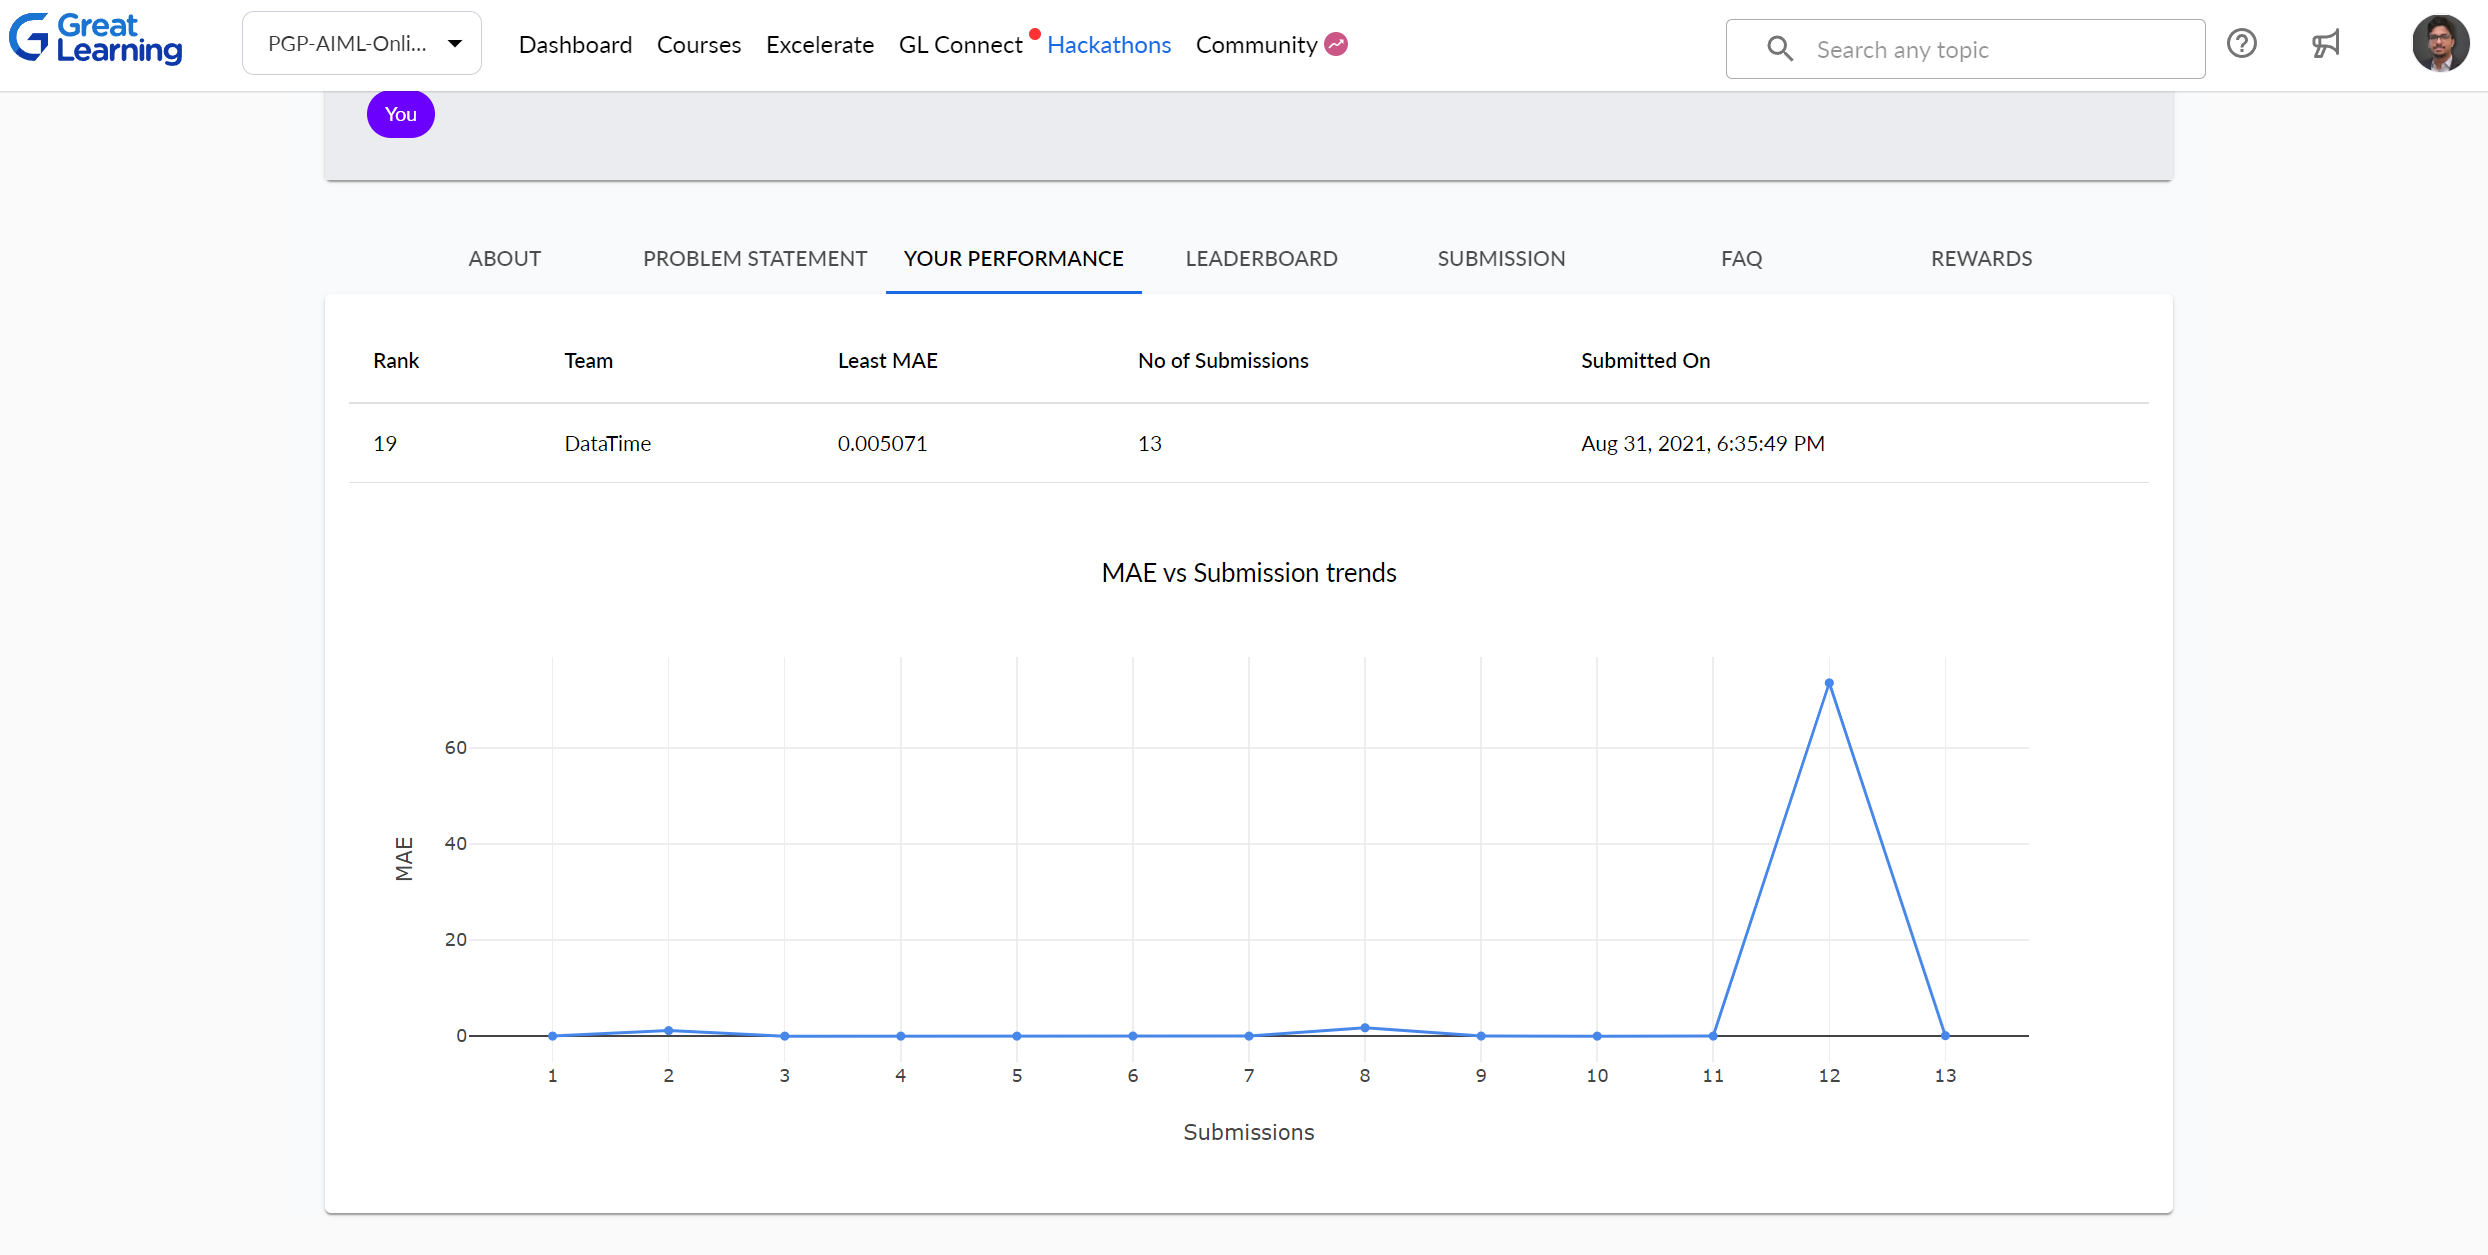

## This Attempt is the 3rd Attempt and it had the least MAE (0.005071) out of all attempts